# **Introduction to qiskit**
***
## Install miniconda
##### Windows Command Prompt
curl https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe -o .\miniconda.exe \
start /wait "" .\miniconda.exe /S \
del .\miniconda.exe
##### Windows PowerShell
wget "https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe" -outfile ".\miniconda.exe" \
Start-Process -FilePath ".\miniconda.exe" -ArgumentList "/S" -Wait \
del .\miniconda.exe \
##### macOS
mkdir -p ~/miniconda3 \
curl https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-arm64.sh -o ~/miniconda3/miniconda.sh \
bash ~/miniconda3/miniconda.sh -b -u -p ~/miniconda3 \
rm ~/miniconda3/miniconda.sh \
##### Linux
https://www.anaconda.com/docs/getting-started/miniconda/install#linux-2

***
## Install Visual Studio Code
##### Windows
https://code.visualstudio.com/download
##### macOS & Linux
/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"

brew install --cask visual-studio-code

## Install and activate environment
Download class.yml from \
https://github.com/Mait-Sark/Quantum-Computing-Lab

conda env create -f qcl.yml 
***
Just to make sure that we are on same page, check qiskit version with the following command


In [1]:
import qiskit
print(qiskit.version.get_version_info())
### Output should be >= 2.0.0

2.0.0


**"import qiskit"**

import → Python keyword that tells the interpreter to load an external library (a package or module).

qiskit → The main Python package for quantum computing. It provides tools to build, simulate, and run quantum circuits and algorithms on quantum computers or simulators.

So this line loads the Qiskit library into your program so you can use its functions.

**"print(qiskit.version.get_version_info())"**

print(...) → A built-in Python function. \
It outputs whatever is inside the parentheses to the console or terminal.

qiskit.version → The version submodule inside Qiskit. \
It contains information about the installed Qiskit version.

get_version_info() → A function in qiskit.version. \
When called, it returns a dictionary containing version details of Qiskit and its components.
***

In order to make sure that all cells of code run properly throughout this lesson, please run the following cell of code below:

In [2]:
from qiskit import QuantumRegister , ClassicalRegister, QuantumCircuit
from qiskit_aer import StatevectorSimulator, QasmSimulator
from qiskit.visualization import visualize_transition
import numpy as np
import math as m
# import warnings
# warnings.filterwarnings('ignore')

S_simulator = StatevectorSimulator()
M_simulator = QasmSimulator()

**"from qiskit import QuantumRegister , ClassicalRegister, QuantumCircuit"**

from qiskit import ... → This tells Python: “go into the qiskit library and bring out specific objects.”

QuantumRegister → A container for qubits. Example: QuantumRegister(2) creates a register of 2 qubits.

ClassicalRegister → A container for classical bits (used to store measurement results of qubits).

QuantumCircuit → The main class that lets you build quantum circuits by adding gates, measurements, and registers.

**"from qiskit_aer import StatevectorSimulator, QasmSimulator"**

qiskit_aer → A package in Qiskit for fast simulation of quantum circuits.

StatevectorSimulator → A simulator that represents the exact quantum statevector (amplitudes of basis states). It is deterministic (no randomness).

QasmSimulator → A simulator that mimics a real quantum computer by sampling measurement outcomes according to quantum probabilities.

**"from qiskit.visualization import visualize_transition"**

qiskit.visualization → The module for plotting and visualizing quantum states/circuits.

visualize_transition → A function that helps visualize how a quantum state changes when a gate is applied.


**"import numpy as np"** → Loads the NumPy library (used for arrays, math, linear algebra) and gives it the shortcut name np. \
Example: np.array([1,2,3]) creates an array. 


**"import math as m"** → Loads Python’s built-in math library (for things like sin, cos, pi) and gives it a shortcut name m.\
Example: m.pi is π, m.sqrt(16) is 4. 
***

\# → Comment symbol (Python ignores this).

If uncommented, this would:

import warnings → load Python’s warnings module.

warnings.filterwarnings('ignore') → suppress warning messages (useful if Qiskit or NumPy prints too many warnings).

**"S_simulator = StatevectorSimulator()"**
Creates an instance (object) of the StatevectorSimulator.

S_simulator is now your personal simulator for exact quantum states.

**"M_simulator = QasmSimulator()"**
Creates an instance (object) of the QasmSimulator.

M_simulator is now your simulator for probabilistic measurements (like a real quantum computer).

# **Qiskit Quantum Gates**
***

List of commonly used single-qubit gates in Qiskit

| Names | Example | Notes |
|-------|---------|-------|
| I, Identity | `qc.id(0)` or `qc.i(0)` | Applies I gate to qubit 0. |
| H, Hadamard | `qc.h(0)` | Applies H gate to qubit 0. |
| X | `qc.x(0)` | Applies X gate to qubit 0. |
| Y | `qc.y([0,1,2])` | Applies Y gates to qubits 0, 1, and 2. |
| Z | `qc.z(0)` | Applies Z gate to qubit 0. Equivalent to P gate with π phase rotation. |
| P, Phase | `qc.p(math.pi/2,0)` | Applies P gate with π/2 phase rotation to qubit 0. |
| S | `qc.s(0)` | Applies S gate to qubit 0. Equivalent to P gate with π/2 phase rotation. |
| S† | `qc.sdg(0)` | Applies S† gate to qubit 0. Equivalent to P gate with 3π/2 phase rotation. |
| SX | `qc.sx(0)` | Applies SX (square root of X) gate to qubit 0. Equivalent to RX gate with π/2 rotation. |
| T | `qc.t(0)` | Applies T gate to qubit 0. Equivalent to P gate with π/4 phase rotation. |
| T† | `qc.tdg(0)` | Applies T† gate to qubit 0. Equivalent to P gate with 7π/4 phase rotation. |
| RX | `qc.rx(math.pi/4,0)` | Applies RX gate with π/4 rotation to qubit 0. |
| RY | `qc.ry(math.pi/8,0)` | Applies RY gate with π/8 rotation to qubit 0. |
| RZ | `qc.rz(math.pi/2,0)` | Applies RZ gate with π/2 rotation to qubit 0. |
| U | `qc.u(math.pi/2,0,math.pi,5)` | Applies rotation with 3 Euler angles to qubit 5. |

### Identity(I)

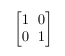

The effect of this gate renders the qubit’s state unchanged.

In [3]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import visualize_transition
import numpy as np
import math

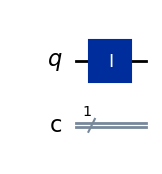

In [4]:
qreg_q = QuantumRegister(1,'q')
creg_c = ClassicalRegister(1,'c')

I_qc = QuantumCircuit(qreg_q,creg_c,name='qc')
I_qc.draw()
I_qc.id(qreg_q[0])
I_qc.draw('mpl')

**"qreg_q = QuantumRegister(1,'q')"**

qreg_q → A variable name chosen by you. It will store a quantum register.

QuantumRegister(1, 'q') → Creates a quantum register with:

1 → the number of qubits (just one qubit here).

'q' → the label name of the register. The qubit will be referred to as q[0].

So qreg_q now represents one qubit named q[0].

**"creg_c = ClassicalRegister(1,'c')"**

creg_c → Variable storing a classical register.

ClassicalRegister(1, 'c') → Creates a classical register with:

1 → the number of classical bits (just one).

'c' → the label name of the register. The bit will be referred to as c[0].

So creg_c now represents one classical bit named c[0].

**"I_qc = QuantumCircuit(qreg_q,creg_c,name='qc')"**

I_qc → A variable holding your quantum circuit.

QuantumCircuit(...) → Creates a new circuit object.

qreg_q → attaches the quantum register (your qubit).

creg_c → attaches the classical register (your classical bit).

name='qc' → gives the circuit the name qc.

So I_qc is now a circuit with 1 qubit and 1 classical bit.

**"I_qc.draw()"**

.draw() → A method of QuantumCircuit that draws the circuit in ASCII art form (plain text, in the console).

At this point the circuit has no gates yet, so it will just show the qubit and classical bit lines.

**"I_qc.id(qreg_q[0])"**

.id(...) → Adds the identity gate (I) to the circuit.

Identity gate does nothing, but it’s useful for timing/alignment.

qreg_q[0] → Refers to the first qubit in the register (since you only have 1, it’s qubit 0).

So this line says: apply the identity gate on qubit 0.

**"I_qc.draw('mpl')"**

'mpl' → Tells Qiskit to use Matplotlib for drawing.

This gives a nicer, graphical version of the circuit instead of ASCII text.

The output will look like a small box labeled I applied to qubit q[0].
***

**QuantumRegister** – this is a class that holds our qubits. When we go to perform gate operations on our system, we call on the QuantumRegister’s index locations, corresponding to the qubits we are interested in.

**QuantumCircuit** – this is a class that can be thought of as our ”instructions” for the quantum system. As we want to design larger and more complex algorithms, we will store operations into QuantumCircuits, which we can then call upon by simulators to run them later.

**Aer** – this is a class that handles using classical simulator backends. Since we will be doing all of our tutorials via classical simulations, we will be using this class regularly. The actual name for this class is AerProvider, but qiskit just lets us import and use it as Aer.

